# Build Spam Message Classification Application with Streamlit | Build Streamlit App

## Spam Text Classification

- N-Gram, Bi-Gram etc
- Bag of Words (BoW)
- Term Frequency Calculation (TF)
- Inverse Document Frequency (IDF)
- Term Frequency - Inverse Document Frequency (TFIDF)
- Text Classification

### N-Gram 
*Pleace turn your page*

* Unigram : `pleace | turn | your | page`
* Bigram  : `pleace turn | turn your | your page`
* Trigram : `pleace turn your | turn your page`

### Bag of Words

The bag-of-words model is a simplifying representation used in NLP and information retrieval.

`x = ['which book is this', 'this is book and this is math']`

| and | book | is  | math | is  | which |
|-----|------|-----|------|-----|-------|
| 0   | 0    | 1   | 1    | 0   | 1     |
| 1   | 1    | 1   | 2    | 1   | 2     |

### Term Frequency (TF)

Term Frequency is simply the ratio of the count of a word present in a sentence, to the length of the sentence.

`x = ['which book is this', 'this is book and this is math']`

|       | and      | book     | is       | math     | is       | which  |
|-------|----------|----------|----------|----------|----------|--------|
| **0** | 0.000000 | 0.250000 | 0.000000 | 0.000000 | 0.250000 | 0.25   |
| **1** | 0.142857 | 0.142857 | 0.285714 | 0.142857 | 0.285724 | 0.00   |


### Inverse Document Frequency (IDF)

`idf = log((1 + N)/(n + 1)) + 1 used in sklearn when smooth_idf = True`

`log -> log base e`

Where, N is the total number of rows and n is the number of rows in which word was present.

|idf                                                                 |
|-----------------------------------------------------------------------|
| [1.40546592637482637, 1.0, 1.0, 1.40546592637482637, 1.0, 1.40546592637482637] |

### TFIDF

- Term Frequency: The summerizes how often a given word appears within a document
- Inverse Document Frequency : This downscales words that appear a lot across documents

`TF * IDF`

| print(x_tfidf.to_array()) |
|---|
| `[[0.  0.448332987 0.448332987 0. 0.448332987 0.54659263]` |
| `[0.39645788 0.2787778 0.55575576 0.39645788 0.55575576 0.]]` |



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/All-CSV-ML-Data-Files-Download/refs/heads/master/spam.tsv', sep= '\t', encoding='latin-1')
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [3]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [4]:
df.shape

(5572, 4)

In [5]:
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

### Dataset Balancing

In [6]:
ham = df[df['label'] == 'ham']
spam = df[df['label'] == 'spam']

In [7]:
ham.shape, spam.shape       # inbalanced dataset

((4825, 4), (747, 4))

In [8]:
ham = ham.sample(spam.shape[0])

In [9]:
ham.shape, spam.shape      # balanced dataset

((747, 4), (747, 4))

In [10]:
data = pd.concat([ham, spam], axis=0, ignore_index=True)
data.shape

(1494, 4)

In [11]:
data.sample(5)

,label,message,length,punct
1022,spam,it to 80488. Your 500 free text messages are v...,74,2
1408,spam,"Goal! Arsenal 4 (Henry, 7 v Liverpool 2 Henry ...",155,4
1144,spam,Ur cash-balance is currently 500 pounds - to m...,139,8
902,spam,Guess what! Somebody you know secretly fancies...,156,4
429,ham,Send me your id and password,28,0


### Exploratory Data Analysis `(EDA)`

In [12]:
plt.rcParams['figure.dpi']==200
plt.rcParams['figure.figsize']=(10,6)
plt.style.use('ggplot')

In [13]:
ham.columns

Index(['label', 'message', 'length', 'punct'], dtype='object')

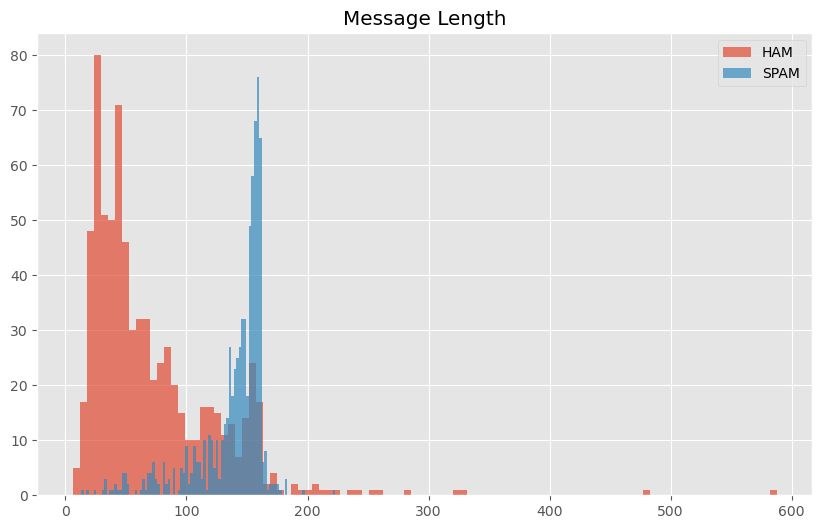

In [14]:
plt.hist(ham['length'], bins=100, alpha=0.7, label='HAM')
plt.hist(spam['length'], bins=100, alpha=0.7, label='SPAM')
plt.title('Message Length')
plt.legend()
plt.show()

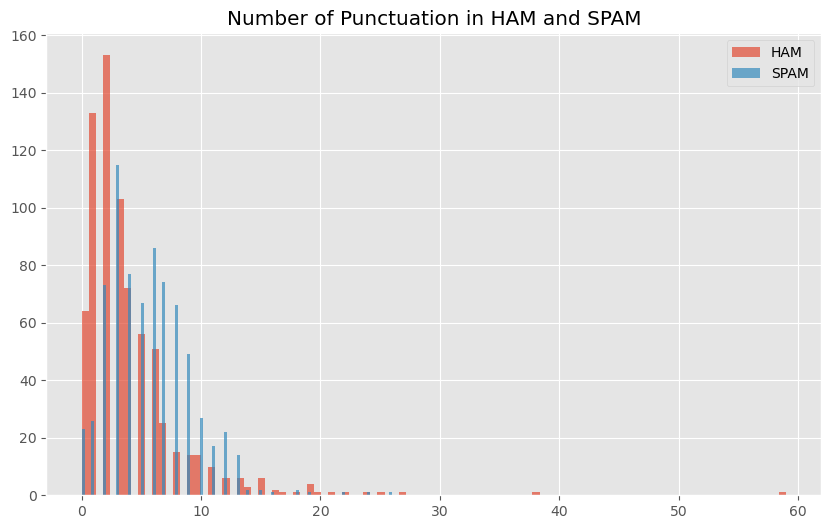

In [15]:
plt.hist(ham['punct'], bins=100, alpha=0.7, label='HAM')
plt.hist(spam['punct'], bins=100, alpha=0.7, label='SPAM')
plt.title('Number of Punctuation in HAM and SPAM')
plt.legend()
plt.show()

### Data Preparation for Training

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    data['message'], 
    data['label'], 
    test_size=0.2, 
    random_state=42, 
    shuffle=True, 
    stratify=data['label'])

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1195,), (299,), (1195,), (299,))

In [18]:
clf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', RandomForestClassifier(
        n_estimators=100, 
        n_jobs=-1, 
        random_state=42, 
        verbose=0
    ))
])

clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', RandomForestClassifier(n_jobs=-1, random_state=42))])

In [19]:
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.91      0.99      0.95       150
        spam       0.99      0.90      0.94       149

    accuracy                           0.95       299
   macro avg       0.95      0.95      0.95       299
weighted avg       0.95      0.95      0.95       299



In [20]:
clf.predict([
    'Hi, How are you doing today?',
    "Dear Valued Customer, Congratulations! You've been selected to receive a free gift card worth $1000, claim it now by clicking the link below before it expires!",
    'hello baby, i feel good today. Thank you very much.',
    'are you kidding me?',
    "URGENT: Your bank account has been compromised, please verify your details immediately to prevent account suspension by logging in here."
    ])


array(['ham', 'spam', 'ham', 'ham', 'spam'], dtype=object)

In [21]:
clf.classes_

array(['ham', 'spam'], dtype=object)

### Model Saving

Save the Model

In [22]:
import pickle

pickle.dump(clf, open('spam_classifier.pkl', 'wb'))

Load the Model

In [23]:
model = pickle.load(open('spam_classifier.pkl', 'rb'))

Try the Model

In [24]:
model.predict([
    "hello baby, i feel good today. Thank you very much.",
    "DEAR SIR/MADAM, YOU HAVE WON $5,000,000 USD IN THE INTERNATIONAL LOTTERY!!! CONTACT US IMMEDIATELY WITH YOUR BANK DETAILS TO CLAIM YOUR PRIZE. THIS IS A ONCE IN A LIFETIME OPPORTUNITY. ACT NOW!!!!"
    ])

array(['ham', 'spam'], dtype=object)